# **MNIST Handwritten Digits Dataset Classification**

# Multi-layer Perception Model using Scikit-learn

We will train and test a multi-layer perception model to classify images from the MNIST handwritten digits dataset using Scikit-learn.

**Load Dataset**

Use fetch_openml method to download the original MNIST dataset and load it into memory.

In [ ]:
from sklearn.datasets import fetch_openml

X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.  # Scale the pixel values to be in [0, 1]

print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


**Split Dataset into Train/Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=10000, random_state=42)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


**Show Example From Training Set With Its Label**

Reshape an example into a 28 x 28 matrix and plot it using matplotlib.

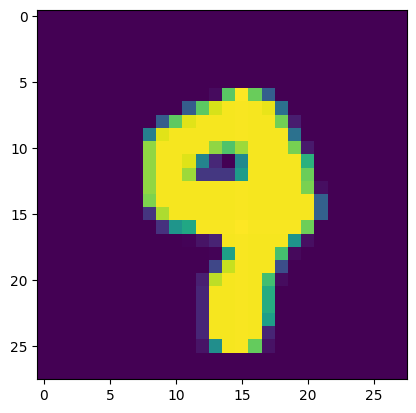

9


In [ ]:
import matplotlib.pyplot as plt

img_id = 22
image = X_train[img_id].reshape((28, 28))
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label)

**Define and Train MLP Classifier**

Define and train MLP classifier with one hidden layer that contains 50 neurons and use ReLU activation. It will be trained using SGD for 30 epochs. 'verbose=True' will be set to track the training progress.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, solver='sgd', verbose=True)
mlp.fit(X_train, Y_train)

Iteration 1, loss = 1.58307950
Iteration 2, loss = 0.76625652
Iteration 3, loss = 0.55893136
Iteration 4, loss = 0.47648085
Iteration 5, loss = 0.43139551
Iteration 6, loss = 0.40231641
Iteration 7, loss = 0.38152939
Iteration 8, loss = 0.36542500
Iteration 9, loss = 0.35245953
Iteration 10, loss = 0.34158813
Iteration 11, loss = 0.33215306
Iteration 12, loss = 0.32387406
Iteration 13, loss = 0.31653576
Iteration 14, loss = 0.30975341
Iteration 15, loss = 0.30351441
Iteration 16, loss = 0.29782328
Iteration 17, loss = 0.29248974
Iteration 18, loss = 0.28749517
Iteration 19, loss = 0.28275300
Iteration 20, loss = 0.27827608
Iteration 21, loss = 0.27406147
Iteration 22, loss = 0.27001334
Iteration 23, loss = 0.26613900
Iteration 24, loss = 0.26228056
Iteration 25, loss = 0.25869787
Iteration 26, loss = 0.25526666
Iteration 27, loss = 0.25191672
Iteration 28, loss = 0.24867761
Iteration 29, loss = 0.24567084
Iteration 30, loss = 0.24250908


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, solver='sgd', verbose=True)

**Show Example From Test Set and Its Predicted Label**

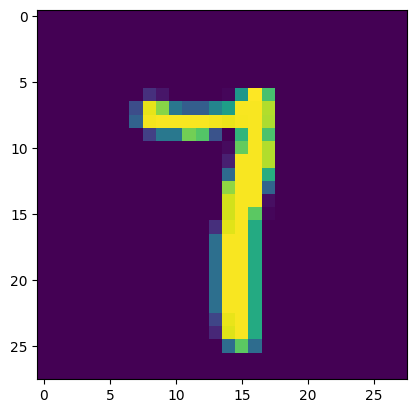

['7']


In [ ]:
img_id = 8
image = X_test[img_id]

# Convert the image into 28 x 28 matrix to plot
plt.imshow(image.reshape((28, 28)))
plt.show()

# Convert the image vector into a matrix 1 x 784 (a dataset with 1 example) before prediction
predicted_label = mlp.predict(image.reshape((1, 784)))
print(predicted_label)

**Evaluate The Trained MLP On The Test Set**

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred = mlp.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.9292


# Multi-layer Perception Model Using Keras

We will train and test a multi-layer perception model to classify images from the MNIST handwritten digits dataset using Keras.

**Load Dataset**

Download the data, load it into memory, and convert pixel values to [0, 1] using Keras API.

In [ ]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**Show Example From Training Set With Its Label**

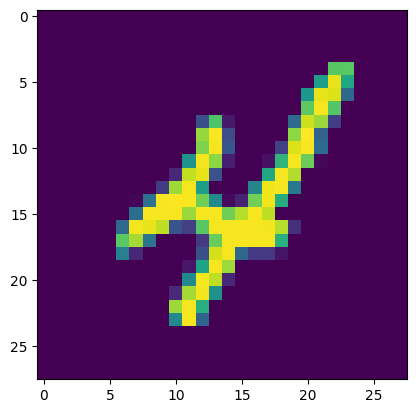

4


In [ ]:
import matplotlib.pyplot as plt

img_id = 9
image = X_train[img_id]
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label)

**Flatten The Inputs Into Vectors**

The images loaded with Keras are not flattened. So, we flatten them into vectors to train the MLP model.

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


**Convert Label Vectors Into One-hot Encodings**

Use the to_categorial method to convert the labels into one-hot encoding vectors.

In [ ]:
from keras.utils import to_categorical

num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

print(Y_train.shape, Y_test.shape)

(60000, 10) (10000, 10)


**Define The MLP Model**

Use Sequential model and Dense layers to define the MLP model. The model will be defined as a Sequential model, and then layers will be added to it one by one.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Compile The Model**

Use cross entropy loss and the SGD optimizer to train the Keras model. The evaluation matrix will be accurancy.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

**Train The Model**

Use fit(...) method to train the model specifying the number of epochs and batch size for training.

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 3s 4ms/step - loss: 1.5701 - accuracy: 0.5555
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5753 - accuracy: 0.8573
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.8858
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3661 - accuracy: 0.8978
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.9053
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3151 - accuracy: 0.9109
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2985 - accuracy: 0.9158
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2853 - accuracy: 0.9193
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2736 - accuracy: 0.9228
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2632 - accura

**Evaluate The Trained Model On Test Set**

Compute the model accuracy on test set.

In [ ]:
_, accuracy = model.evaluate(X_test, Y_test)

print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.9698
0.9697999954223633


# CNN Model Using PyTorch

We will train and test a CNN model to classify images from the MNIST handwritten digits dataset using PyTorch.

**Import Libraries**

In [45]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

**Check PyTorch Version**

In [46]:
print(torch.__version__)

2.1.2+cu121


**Perform Transformations On The Images**

Perform some transformations on the images, such as normalizing the pixel values.

In [47]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

**Define The Training And Testing Sets**

In [48]:
trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
testset = datasets.MNIST('./', download=True, train=False, transform=transform)

**Define Trainloader And Testloader**

Define the batch size to 64.

In [49]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [50]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


**Show An Example From Training Set**

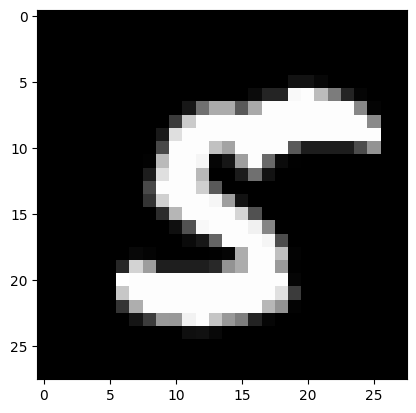

In [51]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray')

In [52]:
dataiter = iter(testloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


**Define The Model Architecture**

In [53]:
class Net(nn.Module):
  def __init__(self):
      super(Net, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(4 * 7 * 7, 10)
      )

**Define The Forward Pass**

In [54]:
def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x

**Define The Model**

In [55]:
model = Net()

**Define The Optimizer**

In [56]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

**Define The Loss Function**

In [57]:
criterion = nn.CrossEntropyLoss()

**Check GPU Availability**

In [58]:
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


We have two convolotioanl layers to help extract features from the images and pass them to the fully connected layer that classify them into their respective class.

**Train The Model**

Train the model for 10 epochs.

In [67]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Define the model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(in_features=64 * 7 * 7, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=10)
        )

    def forward(self, x):
        return self.cnn_layers(x)


# Load the data
train_data = datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True,
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True,
)

# Create the data loaders
trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
testloader = DataLoader(test_data, batch_size=64, shuffle=False)

# Create the model
model = Net()

# Create the criterion and optimizer
criterion = F.cross_entropy

In [68]:
for i in range(10):
    running_loss = 0
    for images, labels in trainloader:

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(trainloader)))

Epoch 1 - Training loss: 2.337424606148368
Epoch 2 - Training loss: 2.337333609808737
Epoch 3 - Training loss: 2.337394889483828
Epoch 4 - Training loss: 2.3373294301124523
Epoch 5 - Training loss: 2.337382724544387
Epoch 6 - Training loss: 2.337381942185766
Epoch 7 - Training loss: 2.3374064906573753
Epoch 8 - Training loss: 2.3373867573260245
Epoch 9 - Training loss: 2.337429886179438
Epoch 10 - Training loss: 2.3374140272770862


In [71]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    img = images[i].view(1, 1, 28, 28)
    with torch.no_grad():
        logps = model(img)


    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.1079


The accuracy of the model is 0.1079 which prove that PyTorch may not the perfect choice for this dataset.

# CNN Model Using TensorFlow

We will train and test a CNN model to classify images from the MNIST handwritten digits dataset using TensorFlow.

**Import Libraries**

In [72]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Check TensorFlow Version**

In [73]:
print(tf.__version__)

2.15.0


**Define The Train And Test Sets**

In [75]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data(path='mnist.npz')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

**Visualize Few Images**

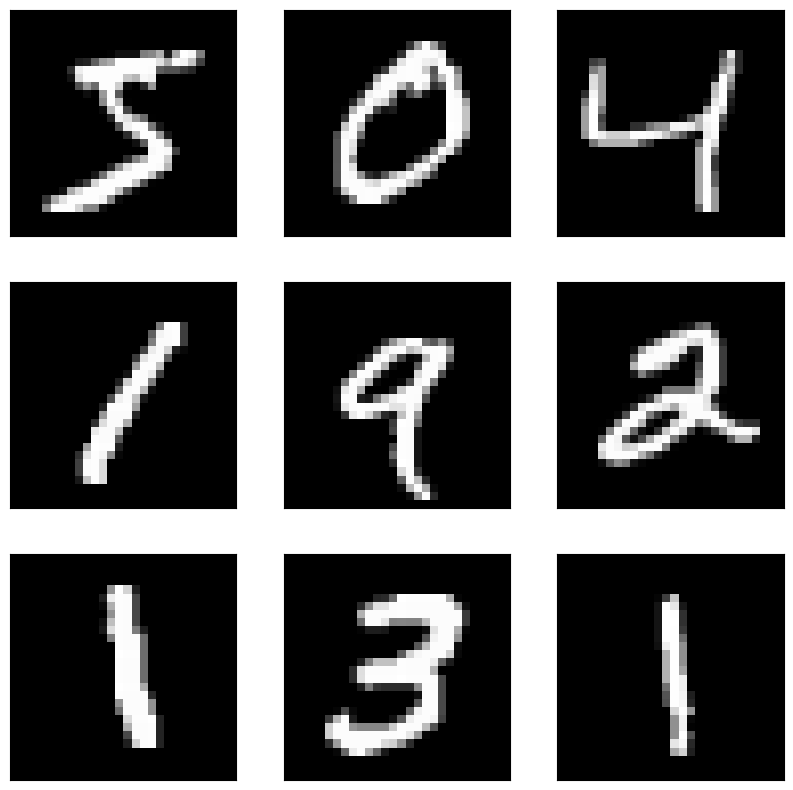

In [76]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

**Check the Training And Test Sets**

In [77]:
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

**Reshape The Images**

In [78]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

**One Hot Encode The Target Variable**

In [79]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Define The Model Architecture**

In [80]:
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 4)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

**Compile The Model**

In [82]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train The Model**

In [84]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4715 - accuracy: 0.8532 - val_loss: 0.1884 - val_accuracy: 0.9415
Epoch 2/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1685 - accuracy: 0.9477 - val_loss: 0.1319 - val_accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1318 - accuracy: 0.9592 - val_loss: 0.1088 - val_accuracy: 0.9653
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1163 - accuracy: 0.9635 - val_loss: 0.1022 - val_accuracy: 0.9665
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1066 - accuracy: 0.9666 - val_loss: 0.0936 - val_accuracy: 0.9684
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0995 - accuracy: 0.9693 - val_loss: 0.0864 - val_accuracy: 0.9712
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0950 - accuracy: 0.9695 - val_loss: 0.0825 -

The training and validation accuracy after 10 epochs are 0.9734 and 0.9721 respectively.